In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

##dataFrame = files.upload()
data = pd.read_excel('bengkel.xlsx')

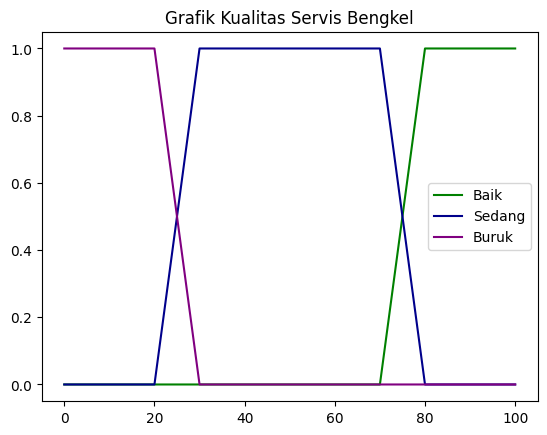

In [2]:
def servis():
    x3 = [0, 70, 80, 100]           # Baik
    y3 = [0, 0, 1, 1]

    x2 = [0, 20, 30, 70, 80, 100]   # Sedang
    y2 = [0, 0, 1, 1, 0, 0]

    x1 = [0, 20, 30, 100]           # Buruk
    y1 = [1, 1, 0, 0]

    # Grafik Servis
    plt.plot(x3, y3, label="Baik", color="green")
    plt.plot(x2, y2, label="Sedang", color="darkblue")
    plt.plot(x1, y1, label="Buruk", color="purple")
    plt.title("Grafik Kualitas Servis Bengkel")

    plt.legend()
    plt.show()

# Call the function to display the plot
servis()


In [3]:
def servis_baik(data):
  if data <= 70:
    return 0
  elif data >= 80:
    return 1
  elif data > 70 and data <= 80:
    return (data - 70) / (80 - 70)

def servis_sedang(data):
  if data <= 20 or data >= 80:
    return 0
  elif data >= 30 and data <= 70:
    return 1
  elif data > 20 and data < 30:
    return (data - 20) / (30 - 20)
  elif data > 70 and data < 80:
    return (80 - data) / (80 - 70)

def servis_buruk(data):
  if data <= 20:
    return 1
  elif data > 30:
    return 0
  elif data > 20 and data <= 30:
    return (30 - data) / (30 - 20)

In [4]:
def fuzzy_kualitas(data):
  servis = {
      'buruk' : servis_buruk(data),
      'sedang' : servis_sedang(data),
      'baik' : servis_baik(data)
  }
  return servis

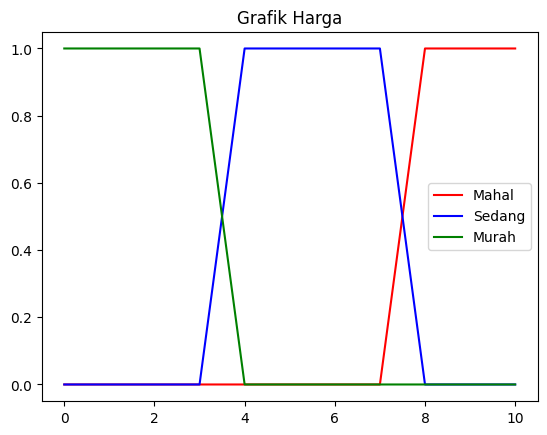

In [6]:
def harga():
  x3 = [0, 7, 8, 10]        # Mahal
  y3 = [0, 0, 1, 1]

  x2 = [0, 3, 4, 7, 8, 10]  # Sedang
  y2 = [0, 0, 1, 1, 0, 0]

  x1 = [0, 3, 4, 10]        # Murah
  y1 = [1, 1, 0, 0]

  # GRAFIK HARGA
  plt.title("Grafik Harga")
  plt.plot(x3, y3, label="Mahal", color="red")
  plt.plot(x2, y2, label="Sedang", color="blue")
  plt.plot(x1, y1, label="Murah", color="green")

  plt.legend()
  plt.show()

# Call the function to display the plot
harga()


In [7]:
def harga_mahal(data):
  if data <= 7:
    return 0
  elif data >= 8:
    return 1
  elif data > 7 and data < 8:
    return (data - 7) / (8 - 7)

def harga_sedang(data):
  if data <= 3 or data >= 8:
    return 0
  elif data >= 4 and data <= 7:
    return 1
  elif data > 3 and data < 4:
    return (data - 3) / (4 - 3)
  elif data > 7 and data < 8:
    return (8 - data) / (8 - 7)

def harga_murah(data):
  if data <= 3:
    return 1
  elif data >= 4:
    return 0
  elif data > 3 and data < 4:
    return (4 - data) / (4 - 3)

In [8]:
def fuzzy_harga(data):
  harga = {
      'murah' : harga_murah(data),
      'sedang' : harga_sedang(data),
      'mahal' : harga_mahal(data)
  }
  return harga

In [9]:
def inference(nilai_servis, nilai_harga):
  rules = {
      'Not Recommend' : [],
      'Considered' : [],
      'Recommend' : []
  }

  result = {
      'Not Recommend' : [],
      'Considered' : [],
      'Recommend' : []
  }

  # RULES IF THEN ( Aturan Fuzzy Untuk NK ( Nilai Kelayakan ))
  rules["Not Recommend"].append(min(nilai_servis['buruk'], nilai_harga['mahal']))
  rules["Not Recommend"].append(min(nilai_servis['buruk'], nilai_harga['sedang']))
  rules["Considered"].append(min(nilai_servis['buruk'], nilai_harga['murah']))

  rules["Not Recommend"].append(min(nilai_servis['sedang'], nilai_harga['mahal']))
  rules["Considered"].append(min(nilai_servis['sedang'], nilai_harga['sedang']))
  rules["Recommend"].append(min(nilai_servis['sedang'], nilai_harga['murah']))

  rules["Considered"].append(min(nilai_servis['baik'], nilai_harga['mahal']))
  rules["Recommend"].append(min(nilai_servis['baik'], nilai_harga['sedang']))
  rules["Recommend"].append(min(nilai_servis['baik'], nilai_harga['murah']))


  result["Not Recommend"].append(max(rules["Not Recommend"]))
  result["Considered"].append(max(rules["Considered"]))
  result["Recommend"].append(max(rules["Recommend"]))

  return result

In [10]:
def deffuzification(rules):
  r = 100
  cn = 80
  nr = 50
  a = rules['Not Recommend']
  b = rules['Considered']
  c = rules['Recommend']
  a = a[0]
  b = b[0]
  c = c[0]
  result = (nr*a + cn*b + r*c) / (a+b+c)
  return result

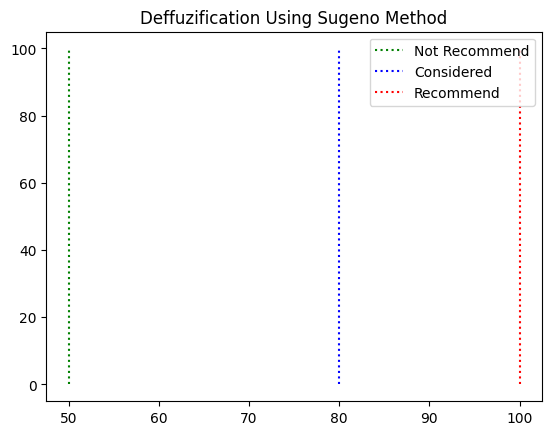

In [11]:
def sugeno_model():
  plt.title("Deffuzification Using Sugeno Method")
  plt.vlines(50, 0, 100, linestyles="dotted", colors ="g", label="Not Recommend")
  plt.vlines(80, 0, 100, linestyles="dotted", colors ="b", label="Considered")
  plt.vlines(100, 0, 100, linestyles="dotted", colors ="r", label="Recommend")
  plt.legend()
  plt.show()

# Call the function to display the plot
sugeno_model()

In [12]:
data = data.to_numpy()

result = []
for g in range(100):

  inf = inference(fuzzy_kualitas(data[g, 1]),fuzzy_harga(data[g, 2]))
  deffuzy = deffuzification(inf)
  if deffuzy <= 50:
    hasil = 'Not Recommended'
  elif (50 < deffuzy <= 80):
    hasil = 'Considered'
  elif 80 < deffuzy:
    hasil = 'Recommended'
  temp = [g + 1, data[g, 1], data[g, 2], deffuzy, hasil]
  result.append(temp)

In [13]:
print("Tabel Hasil Perhitungan Fuzzy 5 Supplier Terbaik")
result.sort(key =  lambda x: x[3], reverse=True)
terbaik = result[:5]

best = pd.DataFrame(terbaik, columns=['ID', 'Servis', 'Harga', 'Skor', 'Predikat'])
best.to_excel('Top5Bengkel.xlsx', index=False)

peringkat = pd.read_excel("Top5Bengkel.xlsx")
peringkat

Tabel Hasil Perhitungan Fuzzy 5 Supplier Terbaik


,ID,Servis,Harga,Skor,Predikat
0,2,54,1,100,Recommended
1,3,98,2,100,Recommended
2,9,45,1,100,Recommended
3,13,80,3,100,Recommended
4,16,82,6,100,Recommended


from matplotlib import pyplot as plt
peringkat['ID'].plot(kind='hist', bins=20, title='ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
peringkat['Servis'].plot(kind='hist', bins=20, title='Servis')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
peringkat['Harga'].plot(kind='hist', bins=20, title='Harga')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
peringkat.plot(kind='scatter', x='ID', y='Servis', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
peringkat.plot(kind='scatter', x='Servis', y='Harga', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ID']
  ys = series['Servis']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = peringkat.sort_values('ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ID')
_ = plt.ylabel('Servis')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['ID']
  ys = series['Harga']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = peringkat.sort_values('ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ID')
_ = plt.ylabel('Harga')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['ID']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'ID'}, axis=1)
              .sort_values('ID', ascending=True))
  xs = counted['ID']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = peringkat.sort_values('ID', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('ID')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Skor']
  ys = series['Servis']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = peringkat.sort_values('Skor', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Skor')
_ = plt.ylabel('Servis')

from matplotlib import pyplot as plt
peringkat['ID'].plot(kind='line', figsize=(8, 4), title='ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
peringkat['Servis'].plot(kind='line', figsize=(8, 4), title='Servis')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
peringkat['Harga'].plot(kind='line', figsize=(8, 4), title='Harga')
plt.gca().spines[['top', 'right']].set_visible(False)